# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory code below

In [1]:
# Write your answer here:

print("243 2916")

243 2916


<font size = "5">

Import the "pandas", "matplotlib.pyplot", "numPy" and "statsmodels.formula.api" libraries

In [3]:
# Write your answer here:

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import os as os



<font size = "5">

(a) Functions

<font size = "3">

- Read the dataset labelled features.csv.
- Create a ``` lambda ``` function that checks if horsepower $>$ 100
- Create a new list that shows true if horsepower $>$ 100 and false <br>
if horsepower $\leq$ 100.
- Count how many cars have horsewpower $> 100$.

To get full credit use either the apply or the map function <br>
(see Lectures 7 and 8)

In [27]:
# Write your answer here

features = pd.read_csv("Data/features.csv")

is_hp_gt_100 = lambda hp: hp > 100

features['horsepower'] = pd.to_numeric(features['horsepower'], errors = 'coerce')

features['hp_gt_100'] = features['horsepower'].apply(is_hp_gt_100)

count_hp_gt_100 = features['hp_gt_100'].sum()

print("Number of cars with horsepower > 100:", count_hp_gt_100)

Number of cars with horsepower > 100: 150


<font size = "5">

(b) Subsetting Data

<font size = "3" >

- Read the dataset labelled features.csv.
- Define a global variable called ```threshold``` that takes the <br>
value 3000
- Subset the data to get one dataset with weight $>$ threshold and <br>
another with weight $\le$ 3000. Use the ```.query()``` function.
- Compute the mean acceleration for each of these datasets.<br>

Note: Review how to define a gloabl variable inside ```.query()```
 

In [5]:
# Write your answer here:

features = pd.read_csv("Data/features.csv")

threshold = 3000

heavy_cars = features.query("weight > @ threshold")
light_cars = features.query("weight <= 3000")

mean_acc_heavy = heavy_cars['acceleration'].mean()
mean_acc_light = light_cars['acceleration'].mean()

print("Mean acceleration of heavy cars (>3000):", mean_acc_heavy)
print("Mean acceleration of ligth cars (<=3000):", mean_acc_light)




Mean acceleration of heavy cars (>3000): 14.7
Mean acceleration of ligth cars (<=3000): 16.202173913043477


<font size = "5">

(c) Regression

<font size = "3">

In this exercise you are asked to plot acceleration vs. weight and to plot <br>
 the best fit line.

- Run a linear regression between acceleration and weight.
- Extract the intercept and coefficient.
- Using your predicted coefficients, compute the predicted value of acceleration
- Plot a scatter plot with acceleration on the y axis and weight on the x axis.
- On that same figure, plot a line with the predicted values of acceleration

Do not forget to label your axes and title.

Intercept    19.606158
weight       -0.001359
dtype: float64


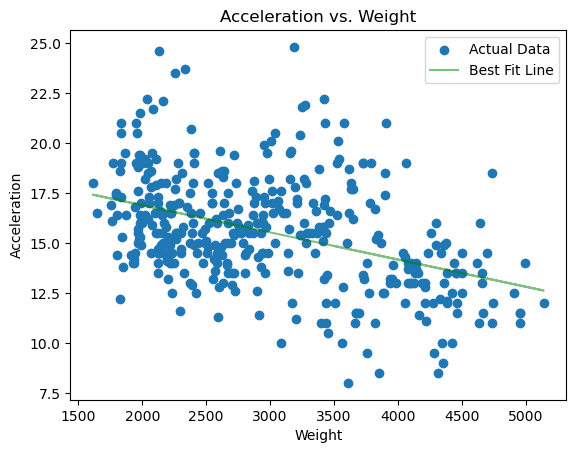

In [10]:
# Write your answer here:

model = smf.ols('acceleration ~ weight', data = features)
results = model.fit()

b_list = results.params
print(b_list)

features["predicted_acceleration"] = b_list[0] + b_list[1]  * features['weight']

plt.scatter(features['weight'], features['acceleration'], label = 'Actual Data')
plt.plot(features['weight'], features['predicted_acceleration'], color = 'green', alpha = 0.5, label = 'Best Fit Line')
plt.xlabel('Weight')
plt.ylabel('Acceleration')
plt.title('Acceleration vs. Weight')
plt.legend()
plt.show()


<font size = "5">

(d) Use sorting + ".iloc[]"

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players

In [9]:
# Write your own code

fifa_players = pd.read_csv("Data/fifa23_players_basic.csv")

youngest_players = fifa_players.sort_values(by = "Age", ascending = True).iloc[:5]

print(youngest_players['Age'])

print(youngest_players)

# Youngest players are A. Dithmer; J. Ardila; S. Ngoma; O. Vargas; A. Madalinksi



17956    16
18014    16
16084    16
11481    16
17591    16
Name: Age, dtype: int64
            Known As        Full Name  Overall  Potential  Value(in Euro)  \
17956     A. Dithmer  Andreas Dithmer       53         76          275000   
18014      J. Ardila      José Ardila       53         73          250000   
16084       S. Ngoma      Serge Ngoma       58         82          650000   
11481      O. Vargas      Obed Vargas       64         81         1500000   
17591  A. Madaliński  Alan Madaliński       54         68          210000   

      Positions Played Best Position    Nationality  \
17956               GK            GK        Denmark   
18014               CM           CAM      Venezuela   
16084               RW            RM  United States   
11481        CM,CDM,RM           CAM  United States   
17591               GK            GK         Poland   

                                             Image Link  Age  ...  \
17956  https://cdn.sofifa.net/players/269/573/23_60.p

<font size = "5">

(e) Use queries + global variables

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Compute the mean of the column "Value(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
Reference the column as ``` `Value(in Euro)`    ``` inside .query()

In [45]:
# Write your own code

fifa_players = pd.read_csv("Data/fifa23_players_basic.csv")

mean_value = fifa_players['Value(in Euro)'].mean()

above_mean_value_players = fifa_players.query("`Value(in Euro)` > @mean_value")

print(above_mean_value_players)





            Known As  ... Defensive Work Rate
0           L. Messi  ...                 Low
1         K. Benzema  ...              Medium
2     R. Lewandowski  ...              Medium
3       K. De Bruyne  ...                High
4          K. Mbappé  ...                 Low
...              ...  ...                 ...
7066       F. Rieder  ...              Medium
7071     J. Bakayoko  ...              Medium
7090        M. Arezo  ...              Medium
7096       Y. Kallon  ...                 Low
7168        M. Soulé  ...              Medium

[3216 rows x 32 columns]


<font size = "5">